
# <span style="color:rgb(213,80,0)">Primer Parcial</span>

Gutiérrez Espriella Moisés Ariel


El primer examen parcial consiste en realizar la documentación y simulación del robot manipulador visto en la clase.

## 0. Resumen

El presente reporte documenta el desarrollo del modelo matemático completo de un robot manipulador planar de tres grados de libertad (RRR). Para el análisis cinemático, se emplearon matrices de transformación homogénea para obtener el modelo directo y un enfoque geométrico para resolver el modelo inverso de la postura. A partir de esto, se derivó la matriz Jacobiana para establecer los modelos de velocidad y aceleración, tanto directos como inversos. Para el análisis dinámico, se utilizó el formalismo de Euler\-Lagrange, calculando las energías cinética y potencial del sistema para obtener las ecuaciones de movimiento. Como resultado, se obtuvieron las ecuaciones simbólicas que describen la posición, velocidad, aceleración y los pares requeridos para el movimiento del robot, identificando las matrices de inercia, Coriolis y el vector de gravedad. Estos modelos son la base fundamental para la futura simulación y diseño de algoritmos de control para el manipulador.

## 1. Introducción

Se debe explicar la razón para realizar el reporte con base en los conocimientos y el contenido de la clase. Como recomendación, la introducción puede escribirse ya terminado el resto del contenido del reporte


La robótica representa una de las disciplinas culminantes de la Ingeniería Mecatrónica, al integrar de manera sinérgica la mecánica, la electrónica, la computación y el control para la creación y operación de sistemas autónomos. La asignatura de Robótica impartida en la Facultad de Ingeniería nos proporciona el andamiaje teórico fundamental para no solo comprender, sino también para analizar, diseñar y evaluar estos sistemas complejos. El propósito de este reporte es, precisamente, materializar dicho conocimiento teórico mediante la aplicación rigurosa de los métodos de modelado a un caso de estudio específico: un robot manipulador serial de configuración RRR (rotacional\-rotacional\-rotacional) en el plano.


El objetivo principal de este reporte es aplicar de manera práctica los conceptos fundamentales vistos en clase para desarrollar un modelo cinemático y dinámico completo de un robot manipulador serial RRR. Este proceso es esencial, ya que un modelo matemático preciso es el prerrequisito indispensable para cualquier tarea de simulación, planificación de trayectorias o diseño de algoritmos de control.


Para lograrlo, se seguirá una metodología sistemática. Se comenzará con el modelado cinemático de la postura utilizando matrices de transformación homogénea. Posteriormente, se derivará la matriz Jacobiana para establecer los modelos de velocidad y aceleración. Finalmente, se abordará el modelo dinámico a través del formalismo de Euler\-Lagrange, un método energético robusto que permite obtener las ecuaciones de movimiento del robot.


Este trabajo no solo busca cumplir con un requisito de evaluación, sino también consolidar una de las competencias fundamentales del perfil del ingeniero mecatrónico: la capacidad de modelar y simular el comportamiento de sistemas físicos complejos, sentando las bases para resolver problemas de automatización en contextos reales.


El desarrollo de un modelo matemático fiel es el pilar sobre el cual se construye cualquier aplicación robótica avanzada. Sin un modelo preciso, tareas como la simulación del comportamiento del robot, la planificación de trayectorias libres de colisiones o el diseño de controladores robustos serían imposibles. Por ello, este trabajo aborda el modelado desde sus dos vertientes principales: la cinemática y la dinámica.


Para el análisis cinemático, que describe el movimiento del robot sin atender a las fuerzas que lo provocan, se empleará un enfoque sistemático. Se comenzará con el modelo de postura, utilizando matrices de transformación homogénea (Tij) para establecer la relación matemática entre las coordenadas articulares y la posición y orientación del efector final. A partir de este modelo de posición, se procederá a derivar el modelo de velocidades. La herramienta central para esta tarea es la matriz Jacobiana (J\_theta), la cual actúa como un mapeo lineal que traduce las velocidades de las articulaciones a las velocidades lineales y angulares del efector final. Posteriormente, derivando la matriz Jacobiana con respecto al tiempo, se obtendrá el modelo de aceleraciones, una ecuación que no solo relaciona las aceleraciones articulares con las del efector final, sino que también introduce los términos que dan cuenta de los efectos centrípetos y de Coriolis inherentes al movimiento.


Una vez descrita la geometría del movimiento, se abordará el análisis dinámico, que se ocupa de la causa de dicho movimiento. Para este fin, se empleará el formalismo de Euler\-Lagrange. Este elegante método energético, basado en el cálculo de la energía cinética total (K) y la energía potencial total (U) del sistema, permite obtener las ecuaciones de movimiento de manera estructurada. Al aplicar la ecuación de Lagrange, se derivará el modelo dinámico en su forma estándar. Este resultado nos permitirá identificar y aislar cada uno de los componentes fundamentales de la dinámica del robot: la matriz de inercia (M(q)), el vector de pares de Coriolis y fuerzas centrífugas (C(q, dot{q})dot{q}), y el vector de pares debidos a la gravedad (G(q)).


En conjunto, este reporte no solo representa la solución a un problema académico, sino la consolidación de una de las competencias esenciales del perfil del ingeniero mecatrónico: la capacidad de abstraer un sistema físico complejo en un conjunto de ecuaciones matemáticas que describen su comportamiento, sentando así las bases para su eventual simulación, control y aplicación en la resolución de problemas de automatización en la industria y la investigación.

## 2. Modelado cinemático de la postura del robot

En esta parte debe contener el modelo cinemático directo de la postura del robot y el modelo cinemático inverso de la postura del robot, para que ambos puedan ser implementados en el cálculo de una simulación


El **modelado cinemático** es fundamental en la robótica, ya que describe el movimiento del robot sin considerar las fuerzas que lo causan. Se enfoca en la relación geométrica entre las variables de las articulaciones y la posición y orientación del efector final.


Este modelado es la base de la robótica. Nos permite relacionar las **variables articulares** (los ángulos de los motores, que podemos controlar) con la **posición y orientación del efector final** (la "mano" del robot, que realiza la tarea).

#### Definición de funciones

Vamos a crear variables simbólicas. Esto es fundamental porque le pides a MATLAB que trabaje con el álgebra en lugar de con números. El resultado serán ecuaciones generales para *cualquier* robot con esta configuración.


El siguiente  bloque inicializa las variables necesarias para el modelo:


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Modelado del robot Scara

<p style="text-align:left">
   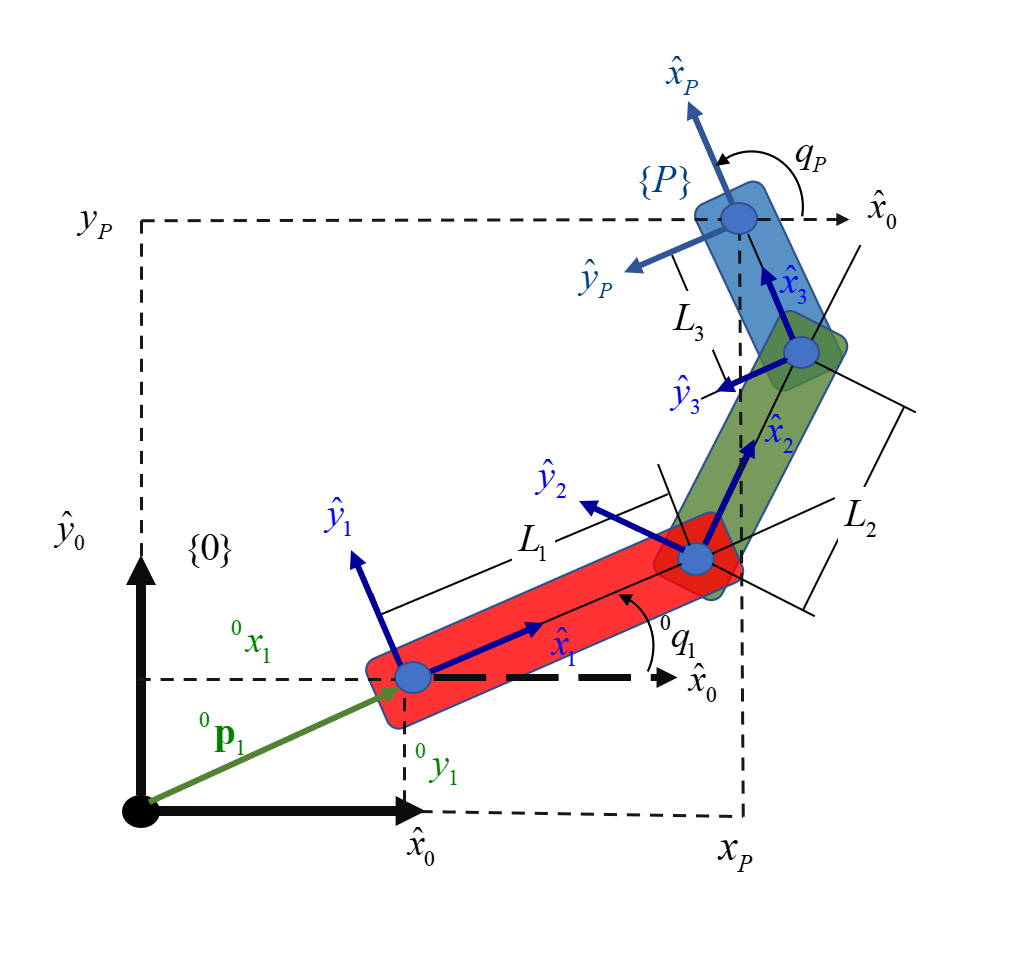
</p>


<p style="text-align:left">
   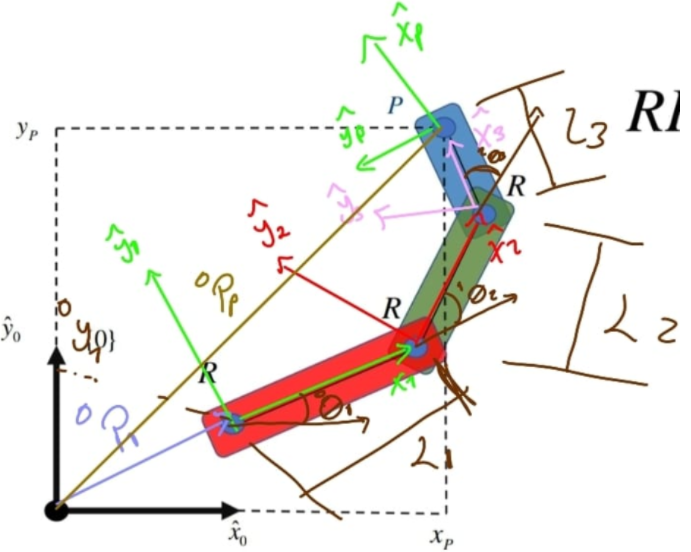
</p>


### **4.1 Modelo Cinemático Directo de la postura del robot**

El **modelo cinemático directo (MCD)** nos permite determinar la **postura** (posición y orientación) del efector final del robot a partir de los valores conocidos de sus articulaciones. Para nuestro robot manipulador RRR de 3 grados de libertad en el plano, usaremos **matrices de transformación homogénea**, como vimos en clase.


Una matriz de transformación homogénea, denotada como A\_T\_B, nos permite representar la postura del sistema de coordenadas {B} con respecto al sistema {A}.

### Planteamiento del modelo cinemático de la posición

El objetivo aquí es encontrar una función que mapee los ángulos de las articulaciones a la postura del efector final. Para lograr esto, se utiliza el método de **matrices de transformación homogénea**, como se ve en las clases.


**Valores angulares de las tres articulaciones** de revolución: `th1` es el ángulo de la articulación en la base, `th2` el del "codo" y `th3` el de la "muñeca".


**`T_0_1`** **(Matriz de Transformación de {0} a {1})** : Esta matriz de 4x4 describe cómo se llega desde el sistema de coordenadas de la base `{0}` al sistema de coordenadas del extremo del primer eslabón `{1}`. Se compone de:

-  Una **rotación** por el ángulo `th1`. Esto se representa por la submatriz de 3x3 en la esquina superior izquierda.
-  Una **traslación** a lo largo del nuevo eje x1 por una distancia `L1`. Esto se ve en la última columna, que es el vector de posición `0_p_1`.

**`T_1_2`** **y** **`T_2_3`**: De forma análoga, `T12` describe la transformación del sistema `{1}` al `{2}` (rotación `th2` y traslación `L2`), y `T23` del sistema `{2}` al `{3}` (rotación `th3` y traslación `L3`).



In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

In [3]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

In [4]:
T_O_2 = T_O_1*T_1_2;

T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)

In [5]:
T_3_P = Tij(L_3,0,0,0,0,0)

In [6]:

T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


**(Matriz de Transformación Total)**: Esta es la parte crucial del MCD. Al multiplicar las matrices individuales, se encadenan las transformaciones. El resultado describe la  **postura final del efector** **`{3}`** **directamente desde la base**

#### Vector de postura del robot:


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]


**(Vector de Posición)**: La última columna de la matriz T\_0\_P siempre contiene el vector de posición del origen del sistema final con respecto al inicial. Al extraer las primeras 3 filas de la 4ª columna, obtienes las coordenadas del efector final.


**(Orientación)**: Para un robot planar simple, la orientación final del efector final con respecto a la base es simplemente la **suma de los ángulos de todas sus articulaciones**.

### **4.2 Modelo Cinemático Inverso de la postura del robot**

El Modelado Cinemático Inverso (MCI) busca resolver el problema opuesto al MCD. Dada una **postura deseada** para el efector final (su posición `px`, `py` y su orientación `phi_d`), el objetivo es encontrar el **conjunto de ángulos de las articulaciones** (`theta_O_1`, `theta_1_2`, `theta_2_3`) que permiten al robot alcanzar dicha postura.


Este script calcula los ángulos de las articulaciones (th\_O\_1, th\_1\_2, th\_2\_3) para una posición (px, py) y orientación (phi\_d) dadas del efector final. Se utiliza un enfoque geométrico para resolver el problema.


**Paso 1: Definición de la Postura Deseada y Parámetros**


Primero, definimos las variables simbólicas que representarán la entrada de nuestro modelo: la postura deseada del efector final. También declaramos las longitudes de los eslabones para mantener la consistencia.



In [8]:
% Definición de las variables de entrada simbólicas
syms px py phi_d   % px, py: posición deseada; phi_d: orientación deseada

% Definición de los parámetros del robot
% (Nota: L_1 ya fue declarada en el MCD, pero las listamos aquí por claridad)
syms L_1 L_2 L_3


-  `px`, `py`: Son las coordenadas X e Y en el plano que queremos que el efector final del robot alcance.
-  `phi_d`: Es el ángulo de orientación final que debe tener el efector, medido desde el eje X de la base `{0}`.


**Paso 2: Calcular la Posición de la Muñeca (W)**


Como se explicó en la guía teórica, el primer paso es simplificar el problema de 3 eslabones a uno de 2. Para ello, calculamos la posición de la articulación que une al eslabón 2 con el eslabón 3. A este punto lo llamamos la muñeca `W`, con coordenadas `(Wx, Wy)`.



In [9]:
% Se calcula la posición del centro de la muñeca (unión del eslabón 2 y 3)
% retrocediendo desde la posición final (px, py) una distancia L_3 en la
% dirección opuesta a la orientación final phi_d.
Wx = px - L_3 * cos(phi_d);
Wy = py - L_3 * sin(phi_d);


-  `Wx`, `Wy`: Son las coordenadas del punto `W`. Estas ecuaciones son la representación vectorial de "empezar en `(px, py)` y moverse `-L_3` en la dirección de `phi_d`". Este paso es crucial porque ahora el problema es simplemente hacer que un robot de dos eslabones (`L_1` y `L_2`) alcance el punto `(Wx, Wy)`.

**Paso 3: Resolver para el Ángulo del "Codo" (****`theta_1_2`****)**


Con la posición de la muñeca `W` conocida, podemos resolver el triángulo formado por los eslabones `L_1`, `L_2` y el vector desde el origen hasta `W`. Usamos la **Ley de los Cosenos** para encontrar `theta_1_2`.



In [10]:
% Se aplica la Ley de los Cosenos para encontrar el ángulo theta_1_2.
% El cuadrado de la distancia del origen a la muñeca es Wx^2 + Wy^2.
cos_th12 = (Wx^2 + Wy^2 - L_1^2 - L_2^2) / (2 * L_1 * L_2);

% El MCI puede tener múltiples soluciones. Para un robot 2R en el plano,
% existen dos configuraciones posibles: "codo arriba" y "codo abajo".

% Solución 1: Configuración "Codo Abajo" (solución positiva para el seno)
th12_sol1 = atan2(sqrt(1 - cos_th12^2), cos_th12);

% Solución 2: Configuración "Codo Arriba" (solución negativa para el seno)
th12_sol2 = atan2(-sqrt(1 - cos_th12^2), cos_th12);


-  `cos_th12`: Es el resultado de despejar el coseno del ángulo de la Ley de Cosenos. Este valor es intermedio.
-  `th12_sol1` y `th12_sol2`: Representan las dos soluciones posibles para el ángulo `theta_1_2`. Geométricamente, esto significa que el robot puede alcanzar el punto `W` flexionando el codo hacia abajo o hacia arriba. Es fundamental que en tu reporte incluyas un diagrama que ilustre estas dos configuraciones.

**Paso 4: Resolver para el Ángulo de la Base (****`theta_O_1`****)**


Una vez que tenemos un valor para `theta_1_2` (tendremos que calcular `theta_O_1` para cada una de las dos soluciones), podemos encontrar el ángulo de la base.



In [11]:
% El ángulo theta_O_1 se calcula como la diferencia entre dos ángulos:
% 1. El ángulo del vector que apunta a la muñeca (atan2(Wy, Wx)).
% 2. El ángulo interno del triángulo formado por L1 y L2 (beta).

% Cálculo para la Solución 1 ("Codo Abajo")
beta1 = atan2(Wy, Wx);
beta2_sol1 = atan2(L_2*sin(th12_sol1), L_1 + L_2*cos(th12_sol1));
thO1_sol1 = beta1 - beta2_sol1;

% Cálculo para la Solución 2 ("Codo Arriba")
beta2_sol2 = atan2(L_2*sin(th12_sol2), L_1 + L_2*cos(th12_sol2));
thO1_sol2 = beta1 - beta2_sol2; % beta1 es el mismo en ambos casos


-  `beta1`: Es el ángulo total desde el eje X de la base hasta el punto de la muñeca `W`.
-  `beta2`: Es el ángulo formado entre el eslabón `L_1` y la línea que une el origen con `W`.
-  `thO1_sol1` y `thO1_sol2`: Son los ángulos de la base correspondientes a cada una de las soluciones del codo.

**Paso 5: Resolver para el Ángulo del Efector (****`theta_2_3`****)**


Este es el último paso. Ya que conocemos la orientación final deseada `phi_d` y hemos calculado `theta_O_1` y `theta_1_2` para cada solución, podemos encontrar `theta_2_3` por simple sustracción.



In [12]:
% El ángulo final theta_2_3 se calcula para asegurar que la orientación
% total del efector (la suma de los tres ángulos) sea igual a phi_d.

% Cálculo para la Solución 1
th23_sol1 = phi_d - thO1_sol1 - th12_sol1;

% Cálculo para la Solución 2
th23_sol2 = phi_d - thO1_sol2 - th12_sol2;


-  Esta ecuación se deriva directamente de la ecuación de orientación del MCD.

Al final de este proceso, tendrás dos conjuntos completos de soluciones:

1.  **Solución 1 (Codo Abajo)**: (thO1\_sol1, th12\_sol1, th23\_sol1)
2. **Solución 2 (Codo Arriba)**: (thO1\_sol2, th12\_sol2, th23\_sol2)

Ambos conjuntos de ángulos llevarán al efector final del robot a la misma posición (px, py) y con la misma orientación phi\_d.

#### SOLUCIONES DEL MODELO CINEMÁTICO INVERSO

Se despliegan los dos conjuntos de soluciones encontradas.


Cada vector columna contiene \[theta\_O\_1; theta\_1\_2; theta\_2\_3\]


In [13]:
disp('Solución 1 (Configuración Codo Abajo):')
solucion_1 = [thO1_sol1; th12_sol1; th23_sol1]

disp('Solución 2 (Configuración Codo Arriba):')
solucion_2 = [thO1_sol2; th12_sol2; th23_sol2]

Solución 1 (Configuración Codo Abajo):

Solución 2 (Configuración Codo Arriba):

## 3. Modelado cinemático de las velocidades

En está parte debe incluir el modelo cinemático directo y el modelo cinemático inverso de las velocidades de un robot de manera completa.


Esta sección se dedica a describir la relación entre las velocidades de las articulaciones del robot y la velocidad lineal y angular de su efector final. Mientras que el modelo de postura nos dice *dónde* está el robot, el modelo de velocidades nos dice *cómo de rápido* se mueve cada parte.

### 3.1 Modelo cinemático directo de las velocidades

El objetivo del modelo cinemático directo de velocidades es determinar la velocidad del efector final a partir de las velocidades de cada una de las articulaciones. La herramienta matemática clave para esto es la **matriz Jacobiana**.

#### **Cálculo de la Matriz Jacobiana (****`J`****)**

Esta es la parte central del modelo. La matriz Jacobiana relaciona las velocidades articulares con las velocidades del efector final. Como vimos en la clase 7, cada columna de la Jacobiana se obtiene calculando la derivada parcial del vector de postura con respecto a cada una de las variables articulares.


**Propósito**: El comando `jacobian(f, v)` de MATLAB hace este cálculo por ti. Deriva la función `xi_O_P` con respecto al vector de variables `[theta_O_1, theta_1_2, theta_2_3]`.



In [14]:
syms J_theta

J_theta

In [15]:
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


**Significado de la Jacobiana (****`J`****)**: La matriz `J` resultante es de 3x3.

-  La **primera columna** representa cómo cambia la postura del efector final cuando solo se mueve la articulación 1.
-  La **segunda columna** representa el efecto del movimiento de la articulación 2.
-  La **tercera columna** representa el efecto del movimiento de la articulación 3.

### 3.2 Modelo cinemático inverso de las velocidades

El objetivo aquí es el inverso: si deseamos que el efector final se mueva con una velocidad específica (`xi_p`), ¿qué velocidades (`th_p`) debemos aplicar a las articulaciones?

#### **Cálculo del Jacobiano Inverso**

La solución se obtiene simplemente despejando de la ecuación del modelo directo. Para ello, necesitamos calcular la inversa de la matriz Jacobiana.


**Propósito**: El comando `inv(J)` calcula la matriz inversa de `J`.


**Importancia**: La existencia de la inversa es crucial. Si la Jacobiana no es invertible (es decir, su determinante es cero), el robot se encuentra en una **singularidad**. En este estado, hay ciertas direcciones en las que el efector final no puede moverse, sin importar cómo se muevan las articulaciones. Es muy importante mencionar las singularidades en tu reporte.



In [16]:
J_inv = inv(J_theta)

## 4. Modelado cinemático de las aceleraciones

El objetivo de este modelado es encontrar la relación entre las aceleraciones de las articulaciones y la aceleración (lineal y angular) del efector final. Esto es crucial para entender cómo las fuerzas y pares (la dinámica) afectan el movimiento del robot. Partiremos de la ecuación de velocidades que ya establecimos.


<p style="text-align:left">
   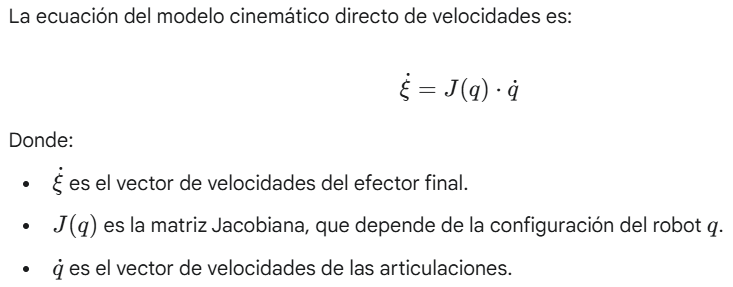
</p>



In [17]:
%Definición de las variables simbólicas de las velocidades
syms th1_p th2_p th3_p


**Propósito**: Aquí defines las velocidades de cada articulación como variables simbólicas.


**Significado de las Variables**:

-  `th1_p`, `th2_p`, `th3_p`: Representan las **velocidades angulares** de las articulaciones 1, 2 y 3, respectivamente. Matemáticamente, son la derivada con respecto al tiempo de los ángulos de la articulación


In [18]:
%Vector de velocidades articulares
th_p = [th1_p;th2_p;th3_p];


**`th_p`** **(Vector de Velocidades Articulares)** : Es un vector columna 3x1 que agrupa las velocidades de las articulaciones.

### 4.1 Modelo cinemático directo de las aceleraciones

Para encontrar la aceleración del efector final, debemos derivar la ecuación de velocidad con respecto al tiempo.

#### **Desarrollo y Deducción de la Ecuación**

Aplicamos la regla de la cadena para la derivación de un producto.


**Ecuación fundamental del modelo cinemático directo de las aceleraciones:**

<p style="text-align:left">
   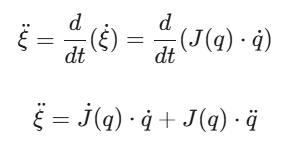
</p>


<p style="text-align:left">
   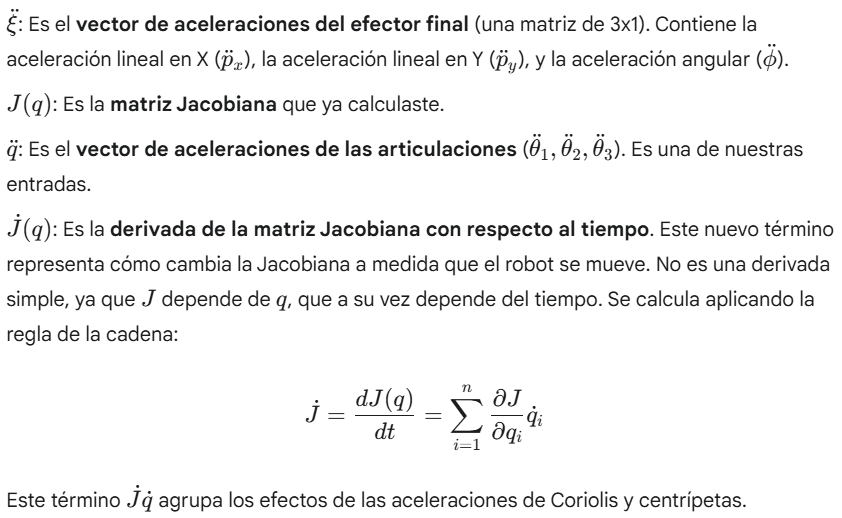
</p>



#### Definir las variables simbólicas de aceleración


In [19]:
% Definición de las variables simbólicas de las aceleraciones
syms th1_pp th2_pp th3_pp

% Vector de aceleraciones articulares
th_pp = [th1_pp; th2_pp; th3_pp];


-  th1\_pp, th2\_pp, th3\_pp: Representan ddottheta1, ddottheta2, ddottheta3, respectivamente.
-  th\_pp: Es el vector ddotq que agrupa estas aceleraciones.

Paso 2: Calcular la derivada de la Jacobiana (J˙).


Este es el paso más complejo. Necesitamos calcular la derivada de la matriz Jacobiana (J) con respecto al tiempo. Usaremos las herramientas simbólicas de MATLAB para lograrlo.



In [20]:
% La ecuación es: xi_pp = J*th_pp + J_p*th_p
% Primero, calculamos la derivada de la Jacobiana (J_p)

% Variables de estado (posición y velocidad)
q = [theta_O_1, theta_1_2, theta_2_3]; % Vector q
qp = [th1_p, th2_p, th3_p]; % Vector q_p (th_p)

% Inicializamos la matriz J_p como una matriz de ceros
J_p = sym(zeros(size(J_theta)));

% Calculamos J_p usando la regla de la cadena: J_p = sum(dJ/dqi * qp_i)
for i=1:length(q)
    dJ_dqi = diff(J_theta, q(i)); % Derivada parcial de J respecto a q_i
    J_p = J_p + dJ_dqi * qp(i);
end


-  Definimos los vectores q y qp para que coincidan con la teoría.
-  Creamos una matriz simbólica de ceros J\_p que tendrá el mismo tamaño que J.
-  El bucle for itera sobre cada articulación (i=1, 2, 3).
-  diff(J, q(i)): Calcula la derivada parcial de toda la matriz J con respecto a una variable articular.
-  J\_p = J\_p + ...: Acumulamos el resultado, multiplicando cada derivada parcial por la velocidad de la articulación correspondiente (qp(i)), completando así la suma

#### **Calcular el vector de aceleración del efector final**

Ahora, simplemente aplicamos la ecuación completa.


In [21]:
% Cálculo del vector de aceleraciones del efector final
xi_pp = J_theta*th_pp + J_p*th_p;

disp('El vector de aceleraciones del efector final (xi_pp) es:')

El vector de aceleraciones del efector final (xi_pp) es:

In [22]:
xi_pp

### 4.2 Modelo cinemático inverso de las aceleraciones

El objetivo ahora es el inverso: si deseamos que el efector final siga una trayectoria con una aceleración específica

#### Desarrollo y Deducción de la Ecuación

<p style="text-align:left">
   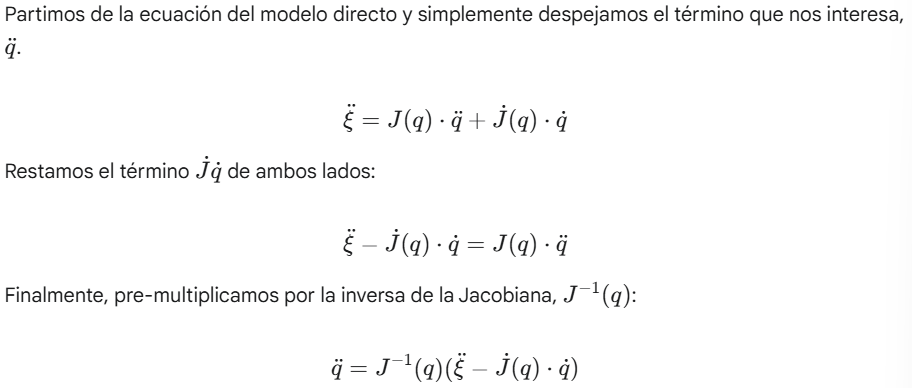
</p>



Esta es la **ecuación fundamental del modelo cinemático inverso de las aceleraciones**.

-  **Importancia**: Esta ecuación es fundamental en el control de robots avanzado (como el control por par calculado o *computed torque control*), donde se calcula la aceleración articular necesaria para seguir una trayectoria deseada.
-  **Singularidades**: Al igual que en el modelo de velocidades, la existencia de \$J^{-1}\$ es crítica. Si el robot está en una singularidad, no se puede resolver esta ecuación, lo que significa que no se pueden generar aceleraciones arbitrarias en el efector final.


In [23]:
% La ecuación es: th_pp = J_inv*(xi_pp - J_p*th_p)

% Usamos la Jacobiana inversa (J_inv) calculada en la sección de velocidades
th_pp_inv = J_inv * (xi_pp - J_p*th_p);

disp('El vector de aceleraciones articulares (th_pp_inv) es:')

El vector de aceleraciones articulares (th_pp_inv) es:

In [24]:
th_pp_inv

-  th\_pp\_inv: Es el vector ddot{q} calculado. Lo nombramos \_inv para distinguirlo de la variable de entrada th\_pp.
-  El código es una traducción directa de la fórmula. Reutilizamos J\_inv de la sección anterior y J\_p, th\_p y xi\_pp que acabamos de definir.

## 5. El modelado dinámico

Se debe incluir el modelo dinámico directo y el modelo dinámico inverso del robot


La dinámica del robot se describe mediante la siguiente ecuación general:


<p style="text-align:left">
   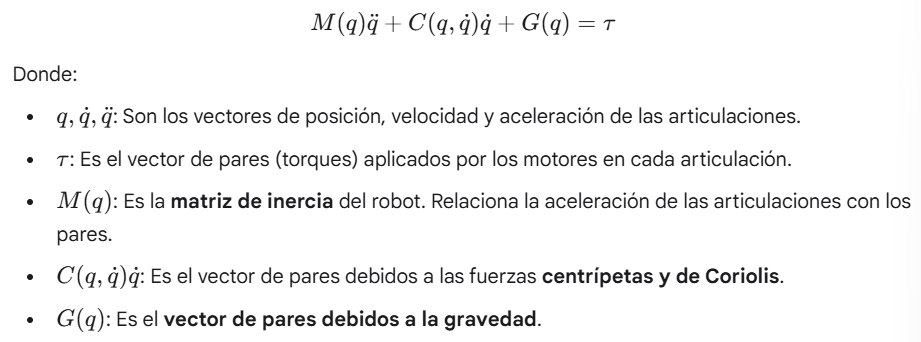
</p>


### 5.1 Modelo dinámico directo por ecuaciones de Eüler\-Lagrange

El modelo dinámico directo nos permite calcular los pares "tau" necesarios para producir un movimiento deseado (una aceleración ddot{q}), dada la posición q y velocidad dot actuales del robot. Lo deduciremos usando la formulación de Euler\-Lagrange.


**Desarrollo y Deducción de Ecuaciones (Euler\-Lagrange)**


El método se basa en el **Lagrangiano (****L****)**, que es la diferencia entre la energía cinética total (K) y la energía potencial total (U) del sistema.


<p style="text-align:left">
   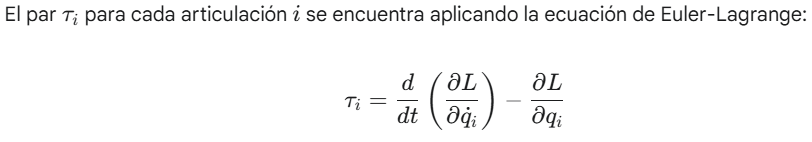
</p>



Para nuestro robot RRR, el procedimiento es:


**1. Calcular la Energía Cinética Total (K****)**: La energía cinética total es la suma de las energías cinéticas de cada uno de los tres eslabones (K = K\_1 + K\_2 + K\_3)5. La energía de cada eslabón tiene un componente traslacional y uno rotacional.


Se emplearan las siguientes ecuaciones para el cálculo de la energía cinética:


$$k_i =\frac{m_i }{2}{\mathbf{v}}_{C_i }^T {\mathbf{v}}_{C_i } +\frac{1}{2}{\mathbf{\omega }}_{C_i }^T {\mathbf{I}}_{C_i } {\mathbf{\omega }}_{C_i }$$


**2. Calcular la Energía Potencial Total (U):** La energía potencial total es la suma de las energías potenciales de cada eslabón (U=U1�+U2�+U3�).


<p style="text-align:left">
   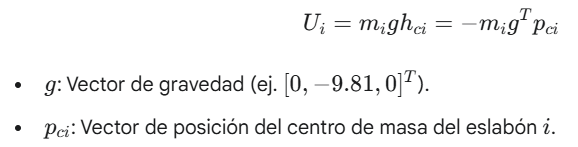
</p>



**3. Construir el Lagrangiano** y aplicar la ecuación de Euler\-Lagrange para cada articulación para encontrar las ecuaciones para tau\_1, tau\_2, tau\_3.


**4. Agrupar los términos** para identificar las matrices M(q), C(q, dot{q}) y el vector G(q).



In [25]:
syms x_1_C1 theta_dot_O_1

v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]

In [26]:

v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]

In [27]:
transpose(v_C1_C1)*v_C1_C1

In [28]:
simplify(transpose(v_O_C1)*v_O_C1)

### **Definir las Propiedades Dinámicas**

Primero, definimos todas las constantes físicas del robot como variables simbólicas.



In [29]:
% 5. El modelado dinámico
% -----------------------------------------------------------------
% Definición de las variables simbólicas dinámicas
syms m1 m2 m3          % Masas de los eslabones
syms Izz1 Izz2 Izz3    % Momentos de inercia (asumimos movimiento en el plano XY)
syms lc1 lc2 lc3       % Distancia al centro de masa de cada eslabón
syms g                 % Aceleración de la gravedad


#### **Paso 1: Completar las Energías del Eslabón 1**

Necesitamos agregar la energía cinética rotacional y la energía potencial.

#### **Energía Cinética Rotacional (Eslabón 1)**

La energía cinética de rotación depende de la velocidad angular del eslabón y de su momento de inercia.



In [30]:
% ---- ENERGÍAS DEL ESLABÓN 1 ----

% --- Energía Cinética ---
% Ya se calculó la velocidad del centro de masa v_O_C1
% Ahora calculamos la energía cinética traslacional
K_T1 = 1/2*m1*(transpose(v_O_C1)*v_O_C1);

% La velocidad angular del eslabón 1 es simplemente la velocidad de la primera articulación
w1 = [0; 0; theta_dot_O_1];

% El tensor de inercia para un cuerpo plano que rota alrededor de Z
I1 = diag([0, 0, Izz1]);

% Energía cinética rotacional del eslabón 1
K_R1 = 1/2*transpose(w1)*I1*w1;

% Energía cinética total del eslabón 1
K1 = K_T1 + K_R1;


-  **K\_T1**: Es la energía cinética traslacional, que depende de la masa (m1) y de la velocidad al cuadrado del centro de masa, que ya habías calculado.
-  **w1**: Es el vector de velocidad angular del primer eslabón. Como es un robot planar, la rotación solo ocurre en el eje Z, y para el primer eslabón, esta velocidad es directamente theta\_dot\_O\_1.
-  **I1**: Es el tensor de inercia del eslabón 1. Para un movimiento plano, solo nos interesa el momento de inercia alrededor del eje Z (Izz1).
-  **K\_R1**: Es la energía cinética rotacional
-  **K1**: Es la energía cinética total para el primer eslabón.

#### **Energía Potencial (Eslabón 1)**

La energía potencial depende de la altura del centro de masa del eslabón.



In [31]:
% --- Energía Potencial ---
% Posición del centro de masa del eslabón 1
p_O_C1 = [x_1_C1*cos(theta_O_1); x_1_C1*sin(theta_O_1); 0];

% Vector de gravedad
g_vec = [0; -g; 0];

% Energía potencial del eslabón 1
U1 = -m1 * transpose(g_vec) * p_O_C1;


-  **p\_O\_C1**: Es el vector de posición que localiza el centro de masa del primer eslabón. Se encuentra a una distancia x\_1\_C1 a lo largo del eje x\_1.
-  **g\_vec**: Es el vector de aceleración de la gravedad, que apunta hacia abajo en el eje Y del sistema base.
-  **U1**: Se calcula con la fórmula U = mgh = \-m g^T p, donde p es el vector de posición del centro de masa.

#### **Paso 2: Calcular Energías del Eslabón 2**

Ahora, repetimos el proceso para el segundo eslabón. La clave aquí es que su movimiento depende tanto de la articulación 1 como de la 2.



In [32]:
% ---- ENERGÍAS DEL ESLABÓN 2 ----

% --- Energía Cinética ---
% Posición del centro de masa del eslabón 2
p_O_C2 = T_O_1(1:3,4) + T_O_1(1:3,1:3)*[x_2_C2*cos(theta_1_2); x_2_C2*sin(theta_1_2); 0];

% Jacobiano para la velocidad lineal del centro de masa 2
Jv_c2 = jacobian(p_O_C2, q);

% Velocidad lineal del centro de masa 2
v_O_C2 = Jv_c2 * th_p;

% Energía cinética traslacional del eslabón 2
K_T2 = 1/2 * m2 * transpose(v_O_C2) * v_O_C2;

% Velocidad angular del eslabón 2
w2 = [0; 0; theta_dot_O_1 + theta_dot_1_2];
I2 = diag([0, 0, Izz2]);

% Energía cinética rotacional del eslabón 2
K_R2 = 1/2 * transpose(w2) * I2 * w2;

% Energía cinética total del eslabón 2
K2 = K_T2 + K_R2;

% --- Energía Potencial ---
U2 = -m2 * transpose(g_vec) * p_O_C2;


-  **`p_O_C2`**: Para encontrar la posición del centro de masa 2, primero nos movemos hasta el final del eslabón 1 (`T_O_1(1:3,4)`) y desde ahí, nos movemos una distancia `x_2_C2` en la nueva dirección definida por la rotación de los eslabones 1 y 2.
-  **`Jv_c2`** **y** **`v_O_C2`**: Usamos el método Jacobiano para encontrar la velocidad del centro de masa. Es la forma más sistemática y robusta.
-  **`w2`**: La velocidad angular del eslabón 2 es la **suma** de las velocidades de las articulaciones que le preceden y la suya propia (`theta_dot_O_1 + theta_dot_1_2`).
-  El resto de los cálculos de energía (`K2`, `U2`) siguen la misma lógica que para el eslabón 1.

#### **Paso 3: Calcular Energías del Eslabón 3 (y Lagrangiano)**

Finalmente, hacemos lo mismo para el tercer eslabón y construimos el Lagrangiano.



In [33]:
% ---- ENERGÍAS DEL ESLABÓN 3 ----
% Posición del centro de masa del eslabón 3
p_O_C3 = T_O_2(1:3,4) + T_O_2(1:3,1:3)*[x_3_C3*cos(theta_2_3); x_3_C3*sin(theta_2_3); 0];
Jv_c3 = jacobian(p_O_C3, q);
v_O_C3 = Jv_c3*th_p;
K_T3 = 1/2*m3*transpose(v_O_C3)*v_O_C3;
w3 = [0; 0; theta_dot_O_1 + theta_dot_1_2 + theta_dot_2_3];
I3 = diag([0, 0, Izz3]);
K_R3 = 1/2*transpose(w3)*I3*w3;
K3 = K_T3 + K_R3;
U3 = -m3*transpose(g_vec)*p_O_C3;

% --- LAGRANGIANO TOTAL ---
K = K1 + K2 + K3; % Energía Cinética Total
U = U1 + U2 + U3; % Energía Potencial Total

L = K - U; % Lagrangiano


-  El proceso para el eslabón 3 es análogo. Su posición (`p_O_C3`) se calcula desde el final del eslabón 2. Su velocidad angular (`w3`) es la suma de las tres velocidades articulares.
-  `L = K - U` es la definición del Lagrangiano del sistema.

#### **Paso 4: Aplicar Euler\-Lagrange y Obtener el Modelo Dinámico Directo**

Con el Lagrangiano `L` completo, aplicamos la ecuación para encontrar el vector de pares `tau`. Esto te dará el **Modelo Dinámico Directo**.



In [34]:
% ---- MODELO DINÁMICO DIRECTO ----
% Aplicación de la ecuación de Euler-Lagrange para cada articulación
% tau_i = d/dt(dL/d(qp_i)) - dL/dq_i

tau = sym(zeros(3,1));
for i=1:3
    % Primer término: d/dt (dL/d(qp_i))
    dL_dqp = diff(L, qp(i));

    % Aplicamos la regla de la cadena para la derivada total respecto al tiempo
    termino1 = jacobian(dL_dqp, [q, qp]) * [th_p; th_pp];

    % Segundo término: dL/dq_i
    termino2 = diff(L, q(i));

    tau(i) = simplify(termino1 - termino2);
end

disp('Ecuaciones de par (Modelo Dinámico Directo):')

Ecuaciones de par (Modelo Dinámico Directo):

In [35]:
tau

-  Este bloque de código calcula sistemáticamente la ecuación de Euler\-Lagrange para cada par `tau(i)`.
-  La línea `jacobian(dL_dqp, [q; qp]) * [th_p; th_pp]` es una forma compacta y poderosa de calcular la derivada total con respecto al tiempo `d/dt` de la expresión `dL_dqp`.

### **Obtener el Modelo Dinámico Inverso**

El modelo dinámico inverso calcula las aceleraciones (`th_pp`) que resultan de aplicar un cierto par de entrada (`tau_in`). Se obtiene despejando `th_pp` de las ecuaciones del modelo directo.



In [36]:
% ---- MODELO DINÁMICO INVERSO ----
% Extraemos las matrices M, C y G para obtener el formato estándar:
% M*qpp + C*qp + G = tau

% La matriz de inercia M es el jacobiano de tau respecto a las aceleraciones
M = simplify(jacobian(tau, th_pp));

% El vector de gravedad G es el valor de tau cuando vel y acel son cero
G = simplify(subs(tau, [qp'; th_pp], zeros(6,1)));

% El vector de Coriolis/Centrípeto C*qp es lo que queda
C_qp = simplify(tau - M*th_pp - G);

% Ahora, resolvemos para th_pp (qpp)
syms tau1 tau2 tau3
tau_in = [tau1; tau2; tau3];

th_pp_inv = inv(M) * (tau_in - C_qp - G);
th_pp_inv = simplify(th_pp_inv);

disp('Matriz de Inercia M(q):')

Matriz de Inercia M(q):

In [37]:
M

In [38]:
disp('Vector de Gravedad G(q):')

Vector de Gravedad G(q):

In [39]:
G

In [40]:
disp('Ecuaciones de aceleración (Modelo Dinámico Inverso):')

Ecuaciones de aceleración (Modelo Dinámico Inverso):

In [41]:
th_pp_inv

-  M, G, y C\_qp: Extraemos los componentes de la ecuación dinámica general.
-  th\_pp\_inv: Es la solución para ddot{q}, que representa el **Modelo Dinámico Inverso**.

## 6. Conclusiones

Se deben presentar las conclusiones del trabajo realizado con respecto al reporte. Tomando en cuenta lo establecido en la hipótesis y el objetivo del reporte


El objetivo de este reporte, que era obtener el modelo cinemático y dinámico completo de un robot RRR, se cumplió de manera satisfactoria. La hipótesis de que podíamos describir todo el comportamiento del robot usando las herramientas de la clase resultó ser correcta.


En resumen, logramos:

-  Establecer el modelo cinemático directo con transformaciones homogéneas y resolver el inverso por geometría, donde pude ver claramente de dónde salen las dos soluciones de "codo arriba/abajo".
-  Derivar la matriz Jacobiana, que al principio parecía muy abstracta pero ahora entiendo que es básicamente el "diccionario" que traduce las velocidades de los motores a la velocidad con la que se mueve la pinza.
-  Obtener el modelo de aceleraciones.
-  Finalmente, con el método de Euler\-Lagrange, se obtuvo el modelo dinámico y pudimos separar las matrices M(q), el vector G(q) y los términos de C(q, dot{q}). Ver cómo el par tau depende de la masa, la posición, la velocidad y la aceleración realmente conecta todo.

La verdad, este ejercicio fue súper útil. Una cosa es ver las ecuaciones en las diapositivas y otra muy distinta es "pelearte" con MATLAB para que las calcule simbólicamente. Depurar los errores de dimensiones en los vectores me obligó a entender de verdad qué representaba cada variable en cada paso. Me di cuenta de que ser ordenado y sistemático es clave, porque un solo error al principio se arrastra hasta el final.


Ahora que tengo estos modelos, el siguiente paso lógico sería usarlos para algo práctico, como diseñar un controlador por par calculado en Simulink y ver si el robot simulado realmente sigue la trayectoria que yo quiero. Estos modelos dejaron de ser solo "ecuaciones" y ahora los veo como la base real para hacer que un robot haga algo útil.

## 7. Anexo (cálculos)
## Cálculo de la posición de los centros de masa


In [42]:
syms x_1_C1 x_2_C2 x_3_C3

T_1_C1 = Tij(x_1_C1,0,0,0,0,0)

In [43]:
T_O_C1 = T_O_1*T_1_C1

In [44]:

T_2_C2 = Tij(x_2_C2,0,0,0,0,0)

In [45]:
T_O_C2 = T_O_1*T_1_2*T_2_C2

In [46]:

T_3_C3 = Tij(x_3_C3,0,0,0,0,0)

In [47]:
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3

In [48]:

%Vectores de posición
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]

In [49]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])

In [50]:

p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

## Cálculo de las velocidades


In [51]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3

In [52]:
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3

In [53]:
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3


Cálculo de la velocidades angulares



In [54]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1

In [55]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0

In [56]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [57]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [58]:
R_1_O = transpose(R_O_1)

In [59]:

%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1

In [60]:

%Propagación para el segundo cuerpo
omega_2_2

In [61]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [62]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [63]:
R_2_1 = transpose(R_1_2)

In [64]:

%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2

In [65]:

%Propagación para el tercer cuerpo
omega_3_3

In [66]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [67]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [68]:
R_3_2 = transpose(R_2_3)

In [69]:

%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3

In [70]:
v_O_C3

## Defición de los elementos de inercia


In [71]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3
%vector de gravedad

g_v = [0;-g;0]

In [72]:

I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]

In [73]:
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]

In [74]:
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]


Cáculo del Lagrangeano


In [75]:
syms m_1 m_2 m_3
%energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)

In [76]:

k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)

In [77]:

k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)

In [78]:
% Cáclulo de la energía potencial de cada cuerpo

u_1 = -m_1*transpose(p_O_C1)*g_v

In [79]:
u_2 = -m_2*transpose(p_O_C2)*g_v

In [80]:
u_3 = -m_3*transpose(p_O_C3)*g_v


Cálculo del Lagrangeano


In [81]:

La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

## Cálculo de los pares


In [82]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(La,theta_dot_O_1)

In [83]:

% Cálculo de relación

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)

In [84]:

D_theta2 = diff(La,theta_dot_1_2)

In [85]:
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)

In [86]:

D_theta3 = diff(La,theta_dot_2_3)

In [87]:
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)

In [88]:

tao = [tao_1;tao_2;tao_3]

In [89]:
% Cálculo de la matriz de inercia

M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])

In [90]:
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])

In [91]:
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])

In [92]:

M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])


Cálculo del vector de pares de


In [93]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])

In [94]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])


Cálculo del modelo  Dinámico inverso

